In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs

import cheer_utils
import importlib
importlib.reload(cheer_utils)
print(cheer_utils.__doc__)

path2pepcfiles="PEPC_Tracks/reanal_100"
#setnums=range(1,11)
setnums='all'

pepc=cheer_utils.LoadPEPC(path2pepcfiles,setnums=setnums) # loads first set
#pepc=cheer_utils.LoadPEPC(path2pepcfiles,setnums=[1,4])  # loads first and fourth sets
#pepc=cheer_utils.LoadPEPC(path2pepcfiles,setnums='all')  # loads all set


    CHEER_UTILS
    utilities for CHEER-STORM
    from repo for codes/processing of STORM datasets for CHEER
    Version 1.6, 13 May 2024
    GitHub Repo: git@github.com:BrianOBlanton/CHEER-STORM.git
    Brian Blanton, RENCI

PEPC_Tracks/reanal_100/selected25_simSS_g001/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g002/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g003/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g004/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g005/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g006/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g007/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g008/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g009/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g010/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g011/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g012/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g013/lon.csv
PEPC_Tracks/reanal_100/selected25_simSS_g014/lon.csv
PEPC_Tracks/reanal_100/selected

In [ ]:
pepc

In [ ]:
cmap=cheer_utils.discrete_cmap(32, 'jet')
norm = mpl.colors.Normalize(vmin=0, vmax=100)
tstr=f'PEPc tracks\n setnums={setnums}'


fig = plt.figure(figsize=(16, 10))

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-60,central_latitude=0))
ax.stock_img()
ax.coastlines()

idx=np.unique(pepc.index).astype(int)

for i,idx in enumerate(idx): 
    x=pepc.loc[pepc.index==idx].Longitude.values
    y=pepc.loc[pepc.index==idx].Latitude.values
    c=pepc.loc[pepc.index==idx].wind.values
    ax.plot(x,y, transform=ccrs.PlateCarree(),color='k',linewidth=.25) 
    # cm=ax.scatter(x=x, y=y, c=c, s=10, 
    #               transform=ccrs.PlateCarree(),cmap=cmap, norm=norm)
    #if i==1: break
    

ax.set_extent([-120, 0, 0, 70], crs=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=1, color='k', alpha=0.25, linestyle='--')
ax.set_title(tstr)
ax.grid(True)

# cb1 = plt.colorbar(cm, ax=ax, orientation='vertical', pad=0.05, aspect=20, shrink=0.8)
# cb1.ax.set_ylabel('pepc "wind"', size=12)
# cb1.ax.tick_params(labelsize='large')


In [4]:
# generate a grid for histogram2d
lo0=-100
lo1=0
la0=0
la1=70
dx,dy=1,1

lon_bins=np.arange(lo0,lo1,dx)
lat_bins=np.arange(la0,la1,dy)

density=True
log10=True
normalized_count=False
cmapName='RdBu_r'


density_pc,      _,      _ = np.histogram2d(pepc.Longitude,pepc.Latitude, bins=(lon_bins,lat_bins), density=density)

print(density_pc.min(),density_pc.max())
nc=10

temppc=density_pc.T.copy()
cbstr='Density'
tstr=f'PEPc tracks\n setnums={setnums}'
temppc=np.where(temppc < 0.0001, np.nan, temppc)

0.0 0.0008961968149498723


Text(0, 0.5, 'Density')

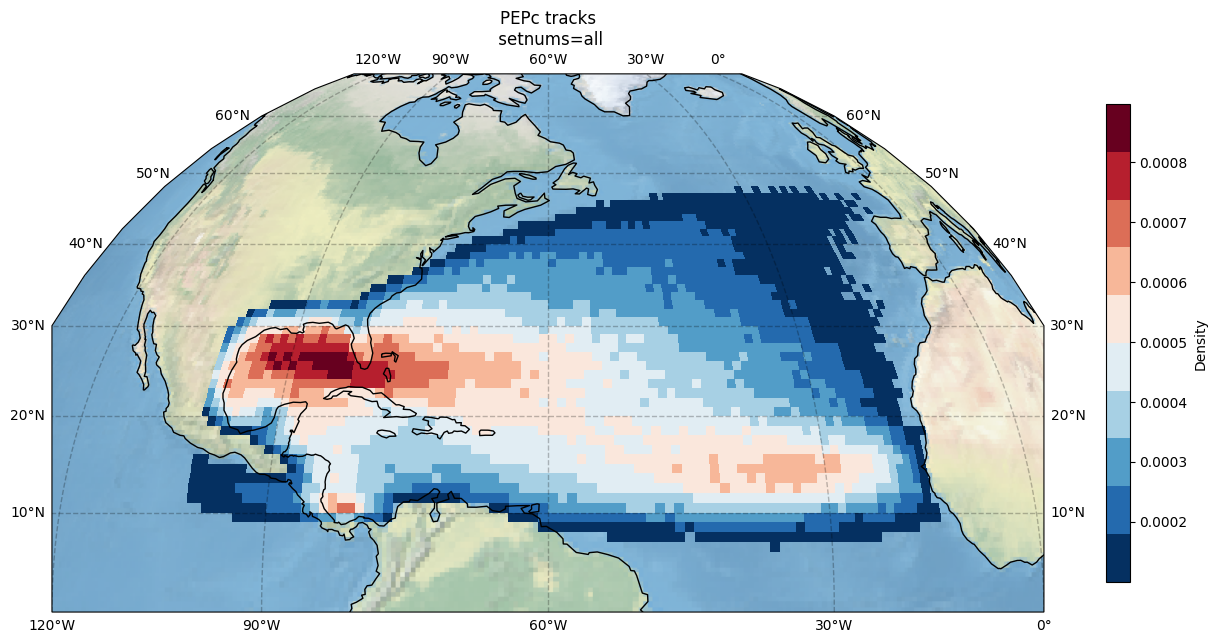

In [5]:
ThisCmap=cheer_utils.discrete_cmap(nc, cmapName)

fig = plt.figure(figsize=(16, 10))

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-60,central_latitude=0) )
ax.stock_img()
ax.coastlines()

ax.set_extent([-120, 0, 0, 70], crs=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=1, color='k', alpha=0.25, linestyle='--')
ax.set_title(tstr)
ax.grid(True)
axm=plt.pcolormesh(lon_bins, lat_bins, temppc, cmap=ThisCmap, transform=ccrs.PlateCarree()) #, vmin=vmin0, vmax=vmax0)
cb=fig.colorbar(axm, ax=ax, shrink=0.62)
cb.ax.set_ylabel(cbstr)